In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Problem - 1: Getting Started with Data Exploration - Some Warm up
#Exercises:
#1. Data Exploration and Understanding:

# Load the dataset (replace with the correct file path or method to access the dataset)
try:
    df = pd.read_csv('/content/drive/MyDrive/Concepts and technonolgy/WHR-2024-5CS037.csv')
except FileNotFoundError:
    print("Error: Dataset file not found. Please check the file path and upload the correct dataset.")
    df = pd.DataFrame()  # Initialize an empty DataFrame to avoid further errors

# 1. Display the first 10 rows
if not df.empty:
    print("First 10 rows:\n", df.head(10))

# 2. Number of rows and columns
if not df.empty:
    print("\nNumber of rows and columns:", df.shape)

# 3. Columns and data type
if not df.empty:
    print("\nColumns and data types:\n", df.dtypes)

# 4. Basic Statistics (assuming a 'score' column exists)
if not df.empty and 'score' in df.columns:
    print("\nMean Score:", df['score'].mean())
    print("Median Score:", df['score'].median())
    print("Standard Deviation of Score:", df['score'].std())

    # Identify countries with highest and lowest happiness scores
    if 'Country name' in df.columns:
        max_score_country = df.loc[df['score'].idxmax()]
        min_score_country = df.loc[df['score'].idxmin()]

        print("\nCountry with highest happiness score:", max_score_country['Country name'],
              "Score:", max_score_country['score'])
        print("Country with lowest happiness score:", min_score_country['Country name'],
              "Score:", min_score_country['score'])

# 5. Missing Values
if not df.empty:
    missing_values = df.isnull().sum()
    print("\nMissing values per column:\n", missing_values[missing_values > 0])

# 6. Filtering and Sorting (assuming 'Log GDP per capita' column exists)
if not df.empty and 'score' in df.columns and 'Log GDP per capita' in df.columns:
    filtered_df = df[df['score'] > 7.5]
    sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False).head(10)
    print("\nTop 10 countries with score > 7.5, sorted by Log GDP per Capita:\n", sorted_df[['Country name', 'score', 'Log GDP per capita']])

# 7. Adding a new column 'Happiness Category'
if not df.empty and 'score' in df.columns:
    # Function to categorize happiness score
    def categorize_happiness(score):
        if score < 4:
            return 'Low'
        elif 4 <= score <= 6:
            return 'Medium'
        else:
            return 'High'

    df['Happiness Category'] = df['score'].apply(categorize_happiness)
    print("\nDataset with 'Happiness Category' column:\n", df[['Country name', 'score', 'Happiness Category']].head())


First 10 rows:
   Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.7

<ipython-input-9-55e796d24788>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country name', y='score', data=top_10_happiest, palette='viridis')


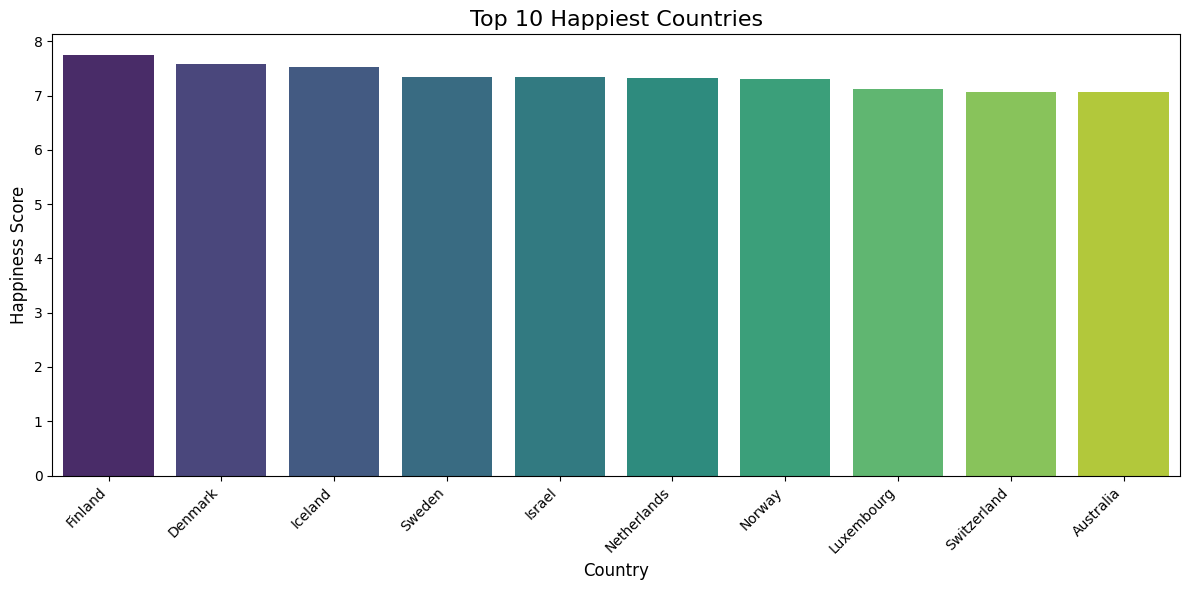

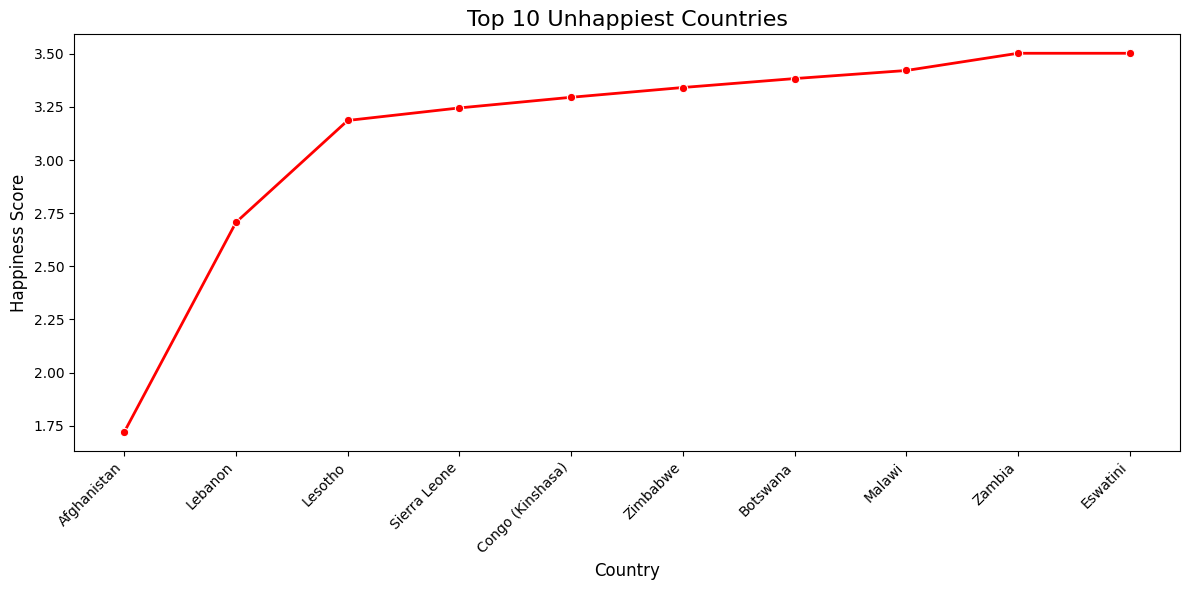

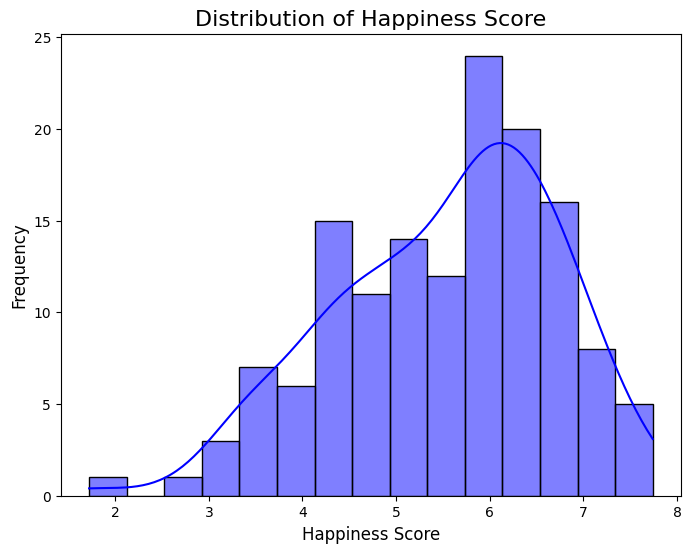

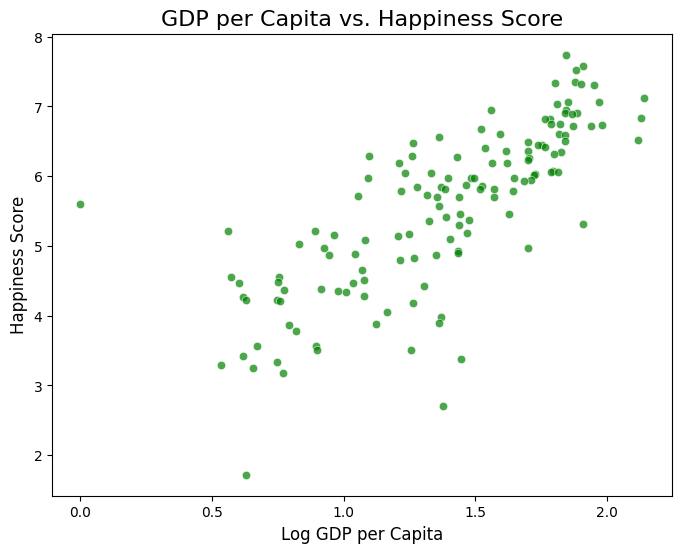

In [ ]:
#2. Data Visualizations:

# Bar Plot: Top 10 happiest countries
if not df.empty and 'Country name' in df.columns and 'score' in df.columns:
    top_10_happiest = df.nlargest(10, 'score')
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Country name', y='score', data=top_10_happiest, palette='viridis')
    plt.title('Top 10 Happiest Countries', fontsize=16)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Happiness Score', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()

# Line Plot: Top 10 unhappiest countries
if not df.empty and 'Country name' in df.columns and 'score' in df.columns:
    top_10_unhappiest = df.nsmallest(10, 'score')
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Country name', y='score', data=top_10_unhappiest, marker='o', color='red', linewidth=2)
    plt.title('Top 10 Unhappiest Countries', fontsize=16)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Happiness Score', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()

# Histogram of Score
if not df.empty and 'score' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df['score'], bins=15, kde=True, color='blue')  # Added kde for density estimation
    plt.title('Distribution of Happiness Score', fontsize=16)
    plt.xlabel('Happiness Score', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()
    # Interpretation: The histogram visualizes the distribution of happiness scores.
    # Observe for skewness, modality, and outliers. For example, a right skew might suggest more countries with lower happiness scores.

# Scatter Plot: GDP per Capita vs. Score
if not df.empty and 'Log GDP per capita' in df.columns and 'score' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Log GDP per capita', y='score', data=df, color='green', alpha=0.7)
    plt.title('GDP per Capita vs. Happiness Score', fontsize=16)
    plt.xlabel('Log GDP per Capita', fontsize=12)
    plt.ylabel('Happiness Score', fontsize=12)
    plt.show()


In [ ]:

#3.2 Problem - 2 - Some Advance Data Exploration Task:
#Task - 1 - Setup Task - Preparing the South-Asia Dataset:
# Define the list of South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Ensure the DataFrame `df` is loaded correctly
try:
    # Replace with the correct path to your dataset
    df = pd.read_csv('/content/drive/MyDrive/Concepts and technonolgy/WHR-2024-5CS037.csv')
except FileNotFoundError:
    print("Error: Dataset file not found. Please check the file path and upload the correct dataset.")
    df = pd.DataFrame()

# Filter the DataFrame to include only South Asian countries
if not df.empty and 'Country name' in df.columns:
    south_asia_df = df[df['Country name'].isin(south_asian_countries)]
    # Display the filtered DataFrame
    print("Filtered South Asian Dataset:\n", south_asia_df)
else:
    print("Error: The DataFrame is empty or 'Country name' column is missing.")


Filtered South Asian Dataset:
     Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Per

<ipython-input-12-3e8dee1b5860>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite Score'] = (
<ipython-input-12-3e8dee1b5860>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Composite Score', y='Country name', data=south_asia_df.head(5), palette='viridis')


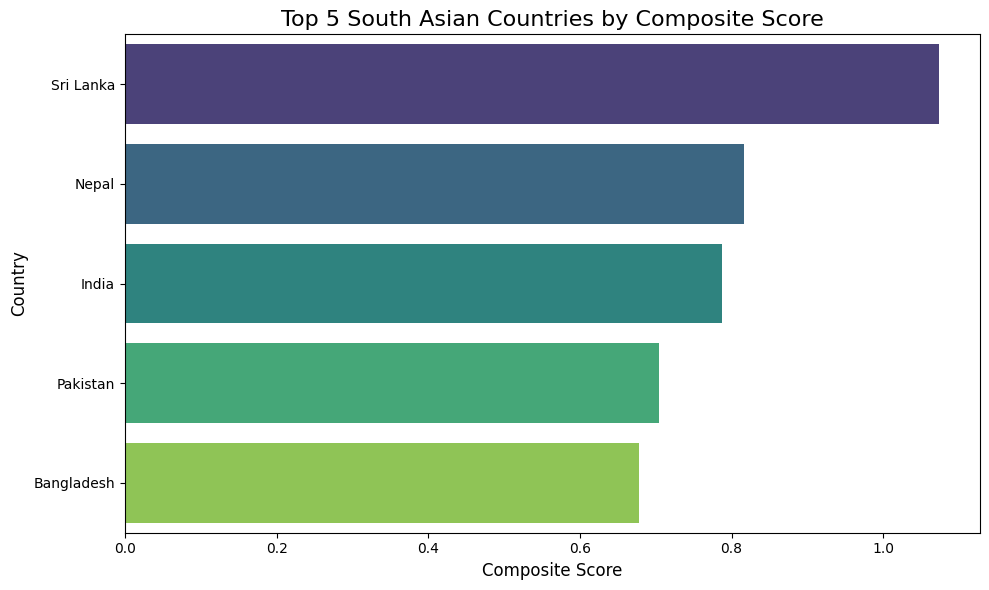

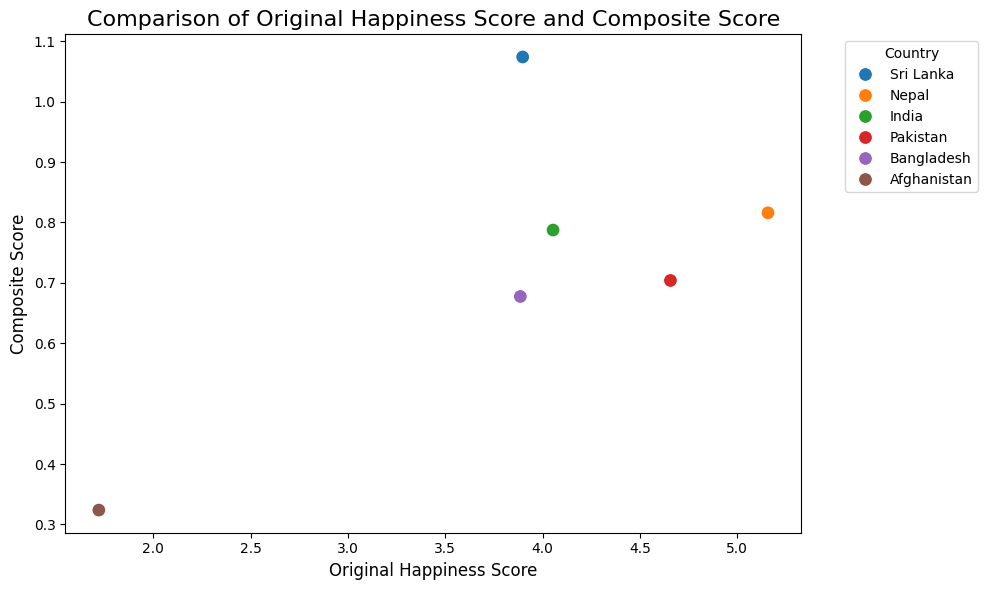

Discussion:
The scatter plot compares the original happiness score with the calculated composite score for each South Asian country.
A strong positive correlation between the two scores would suggest that the composite score aligns well with the original happiness score.
Deviations from a perfect correlation might indicate that the composite score captures other aspects of well-being not fully reflected in the original score, or that some factors are more heavily weighted in one score than the other.

Correlation between Original Score and Composite Score: 0.68


In [ ]:
#Task - 2 - Composite Score Ranking:
if not south_asia_df.empty:
    # 1. Calculate the Composite Score
    south_asia_df['Composite Score'] = (
        0.40 * south_asia_df['Log GDP per capita'] +
        0.30 * south_asia_df['Social support'] +
        0.30 * south_asia_df['Healthy life expectancy']
    )

    # 2. Rank the countries based on Composite Score
    south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False).reset_index(drop=True)

    # 3. Visualize the top 5 countries using a horizontal bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Composite Score', y='Country name', data=south_asia_df.head(5), palette='viridis')
    plt.title('Top 5 South Asian Countries by Composite Score', fontsize=16)
    plt.xlabel('Composite Score', fontsize=12)
    plt.ylabel('Country', fontsize=12)
    plt.tight_layout()
    plt.show()

    # 4. Compare rankings with the original Score
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='score', y='Composite Score', data=south_asia_df, hue='Country name', palette='tab10', s=100)
    plt.xlabel("Original Happiness Score", fontsize=12)
    plt.ylabel("Composite Score", fontsize=12)
    plt.title("Comparison of Original Happiness Score and Composite Score", fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')
    plt.tight_layout()
    plt.show()

    # Discussion and Analysis
    print("Discussion:")
    print("The scatter plot compares the original happiness score with the calculated composite score for each South Asian country.")
    print("A strong positive correlation between the two scores would suggest that the composite score aligns well with the original happiness score.")
    print("Deviations from a perfect correlation might indicate that the composite score captures other aspects of well-being not fully reflected in the original score, or that some factors are more heavily weighted in one score than the other.")

    # Calculate the correlation coefficient
    correlation = south_asia_df['score'].corr(south_asia_df['Composite Score'])
    print(f"\nCorrelation between Original Score and Composite Score: {correlation:.2f}")
else:
    print("Error: The South Asia DataFrame is empty.")


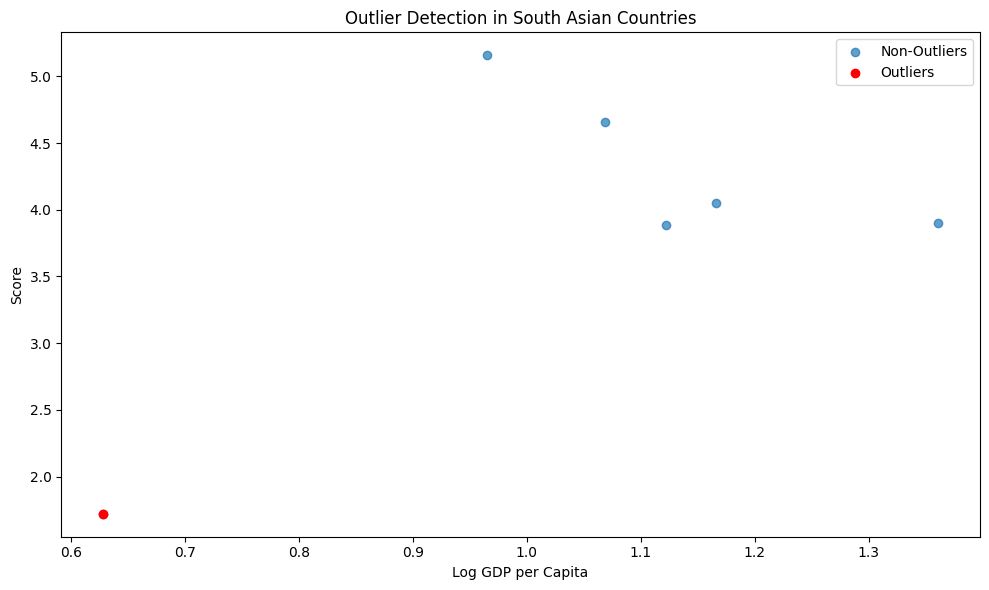

Discussion:
Outlier countries: ['Afghanistan']
These countries exhibit significant deviations in either GDP per capita or Happiness score compared to the majority of other South Asian nations.
Potential impact: Outliers can skew regional averages, affecting overall insights into the region's development and well-being. Further investigation is required to understand these deviations.


In [ ]:
#Task - 3 - Outlier Detection:

# Ensure the DataFrame and necessary columns are present
if not south_asia_df.empty and 'Log GDP per capita' in south_asia_df.columns and 'score' in south_asia_df.columns:
    # Step 1: Calculate IQR for 'Log GDP per capita'
    Q1_gdp = south_asia_df['Log GDP per capita'].quantile(0.25)
    Q3_gdp = south_asia_df['Log GDP per capita'].quantile(0.75)
    IQR_gdp = Q3_gdp - Q1_gdp
    lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
    upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

    # Step 2: Calculate IQR for 'score'
    Q1_score = south_asia_df['score'].quantile(0.25)
    Q3_score = south_asia_df['score'].quantile(0.75)
    IQR_score = Q3_score - Q1_score
    lower_bound_score = Q1_score - 1.5 * IQR_score
    upper_bound_score = Q3_score + 1.5 * IQR_score

    # Step 3: Identify outliers based on IQR
    outliers = south_asia_df[
        (south_asia_df['Log GDP per capita'] < lower_bound_gdp) |
        (south_asia_df['Log GDP per capita'] > upper_bound_gdp) |
        (south_asia_df['score'] < lower_bound_score) |
        (south_asia_df['score'] > upper_bound_score)
    ]

    # Step 4: Create a scatter plot with outliers highlighted
    plt.figure(figsize=(10, 6))
    plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], label='Non-Outliers', alpha=0.7)
    plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers', alpha=1)
    plt.xlabel('Log GDP per Capita')
    plt.ylabel('Score')
    plt.title('Outlier Detection in South Asian Countries')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Step 5: Discuss the outliers
    print("Discussion:")
    if not outliers.empty:
        print("Outlier countries:", outliers['Country name'].tolist())
        print("These countries exhibit significant deviations in either GDP per capita or Happiness score compared to the majority of other South Asian nations.")
        print("Potential impact: Outliers can skew regional averages, affecting overall insights into the region's development and well-being. Further investigation is required to understand these deviations.")
    else:
        print("No outliers found based on the defined criteria.")
else:
    print("Error: Required columns not found in the DataFrame or the DataFrame is empty.")


Pearson correlation between Freedom to make life choices and Score: 0.80
Pearson correlation between Generosity and Score: 0.87


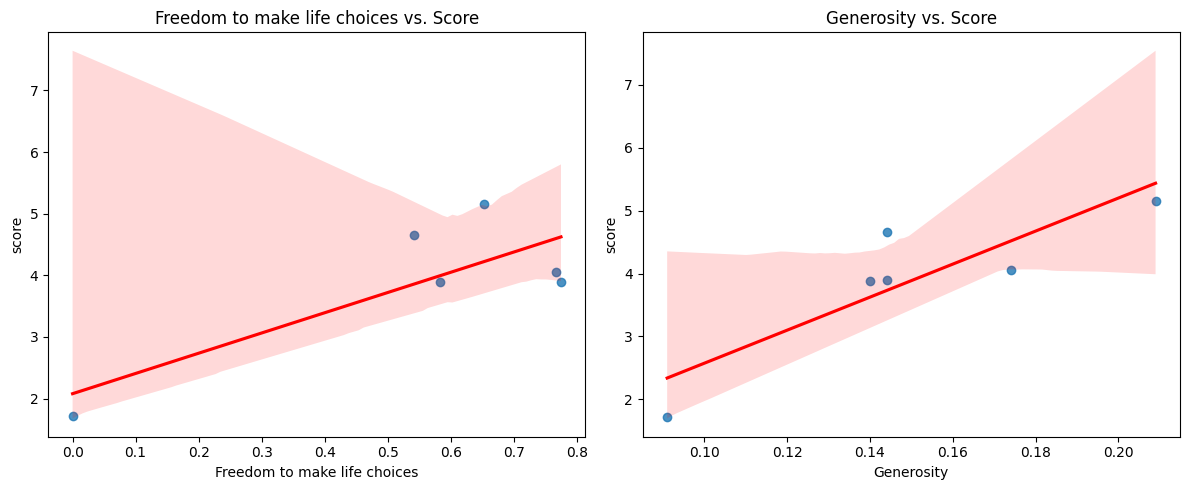


Discussion:
The strength of the relationship between Freedom to make life choices and the Score is indicated by the correlation coefficient (0.80).
A positive correlation suggests that higher levels of Freedom to make life choices tend to be associated with higher happiness scores, while a negative correlation implies the opposite.
Similarly, the correlation between Generosity and the Score is 0.87, indicating the strength and direction of their relationship.

Strongest relationship: Generosity (correlation: 0.87)
Weakest relationship: Freedom to make life choices (correlation: 0.80)


In [ ]:
#Task - 4 - Exploring Trends Across Metrics:

# Assuming south_asia_df is already defined and contains the necessary columns

# Choose two metrics (example: Freedom to make life choices and Generosity)
metric1 = 'Freedom to make life choices'
metric2 = 'Generosity'

if metric1 in south_asia_df.columns and metric2 in south_asia_df.columns and 'score' in south_asia_df.columns:
    # 1. Calculate Pearson correlation for each metric with 'score'
    correlation1 = south_asia_df[metric1].corr(south_asia_df['score'], method='pearson')
    correlation2 = south_asia_df[metric2].corr(south_asia_df['score'], method='pearson')

    # Output the correlation values
    print(f"Pearson correlation between {metric1} and Score: {correlation1:.2f}")
    print(f"Pearson correlation between {metric2} and Score: {correlation2:.2f}")

    # 2. Create scatter plots with trendlines for both metrics
    plt.figure(figsize=(12, 5))

    # Plot for the first metric
    plt.subplot(1, 2, 1)
    sns.regplot(x=metric1, y='score', data=south_asia_df, line_kws={"color": "red"})
    plt.title(f'{metric1} vs. Score')

    # Plot for the second metric
    plt.subplot(1, 2, 2)
    sns.regplot(x=metric2, y='score', data=south_asia_df, line_kws={"color": "red"})
    plt.title(f'{metric2} vs. Score')

    plt.tight_layout()
    plt.show()

    # 3. Discuss the relationships
    print("\nDiscussion:")
    print(f"The strength of the relationship between {metric1} and the Score is indicated by the correlation coefficient ({correlation1:.2f}).")
    print(f"A positive correlation suggests that higher levels of {metric1} tend to be associated with higher happiness scores, while a negative correlation implies the opposite.")

    print(f"Similarly, the correlation between {metric2} and the Score is {correlation2:.2f}, indicating the strength and direction of their relationship.")

    # Identify strongest and weakest relationships based on correlation coefficients
    if abs(correlation1) > abs(correlation2):
        strongest_metric = metric1
        weakest_metric = metric2
        strongest_corr = correlation1
        weakest_corr = correlation2
    else:
        strongest_metric = metric2
        weakest_metric = metric1
        strongest_corr = correlation2
        weakest_corr = correlation1

    print(f"\nStrongest relationship: {strongest_metric} (correlation: {strongest_corr:.2f})")
    print(f"Weakest relationship: {weakest_metric} (correlation: {weakest_corr:.2f})")

else:
    print("Error: One or more required columns are missing from the DataFrame.")


  Country name  Log GDP per capita  score  GDP-Score Gap  Rank Ascending  \
0    Sri Lanka               1.361  3.898         -2.537             5.0   
1        Nepal               0.965  5.158         -4.193             1.0   
2        India               1.166  4.054         -2.888             3.0   
3     Pakistan               1.069  4.657         -3.588             2.0   
4   Bangladesh               1.122  3.886         -2.764             4.0   
5  Afghanistan               0.628  1.721         -1.093             6.0   

   Rank Descending  
0              2.0  
1              6.0  
2              4.0  
3              5.0  
4              3.0  
5              1.0  


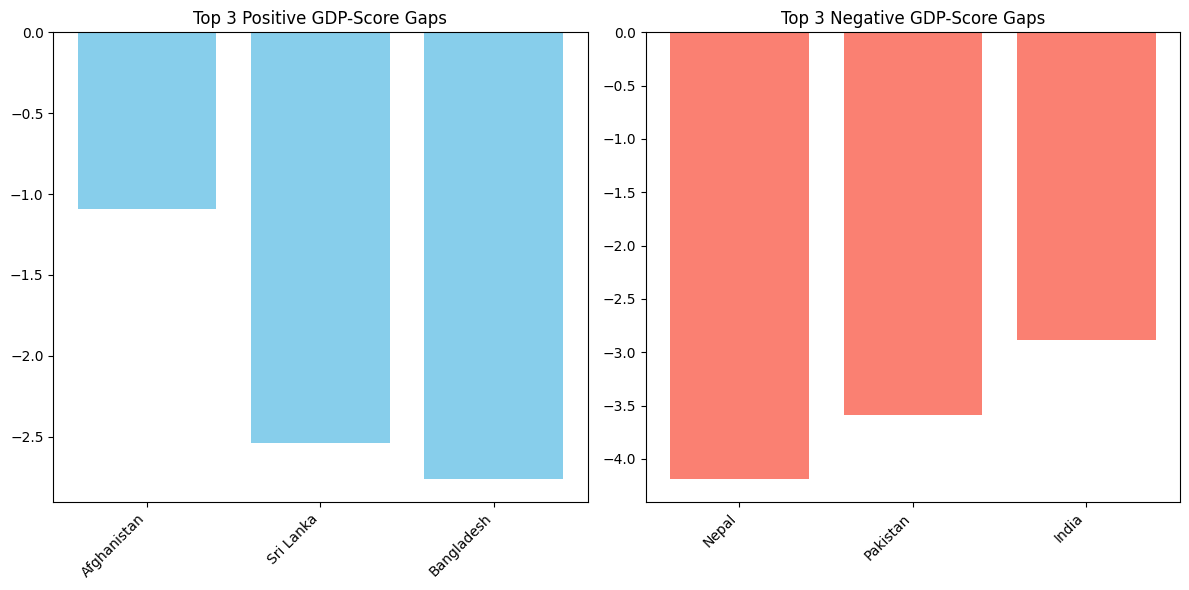

Analysis:
The GDP-Score Gap provides insights into the relationship between economic prosperity and happiness.
Positive gaps suggest countries where economic prosperity is higher relative to happiness scores, potentially indicating other factors impacting happiness.
Negative gaps might suggest countries where happiness scores are high relative to economic indicators, implying strong social support, health, or other relevant factors.


In [ ]:
#Task - 5 - Gap Analysis:
if not south_asia_df.empty and 'Log GDP per capita' in south_asia_df.columns and 'score' in south_asia_df.columns:
    # Calculate 'GDP-Score Gap'
    south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

    # Rank by GDP-Score Gap (ascending and descending)
    south_asia_df['Rank Ascending'] = south_asia_df['GDP-Score Gap'].rank(ascending=True)
    south_asia_df['Rank Descending'] = south_asia_df['GDP-Score Gap'].rank(ascending=False)

    # Display the DataFrame with new columns
    print(south_asia_df[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap', 'Rank Ascending', 'Rank Descending']])

    # Top 3 largest positive and negative gaps
    top3_positive = south_asia_df.nlargest(3, 'GDP-Score Gap')
    top3_negative = south_asia_df.nsmallest(3, 'GDP-Score Gap')

    # Bar chart for visualization
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.bar(top3_positive['Country name'], top3_positive['GDP-Score Gap'], color='skyblue')
    plt.title('Top 3 Positive GDP-Score Gaps')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(1, 2, 2)
    plt.bar(top3_negative['Country name'], top3_negative['GDP-Score Gap'], color='salmon')
    plt.title('Top 3 Negative GDP-Score Gaps')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    # Analysis of the gaps (you'll need to replace this with your actual analysis)
    print("Analysis:")
    print("The GDP-Score Gap provides insights into the relationship between economic prosperity and happiness.")
    print("Positive gaps suggest countries where economic prosperity is higher relative to happiness scores, potentially indicating other factors impacting happiness.")
    print("Negative gaps might suggest countries where happiness scores are high relative to economic indicators, implying strong social support, health, or other relevant factors.")

else:
    print("Error: Necessary columns are missing or the DataFrame is empty.")

In [ ]:
#1. Descriptive Statistics:

middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

if not df.empty and 'Country name' in df.columns:
    middle_east_df = df[df['Country name'].isin(middle_east_countries)]
    print("Middle East Dataset:\n", middle_east_df)

    # Calculate mean and standard deviation for both regions
    if not middle_east_df.empty and not south_asia_df.empty and 'score' in df.columns:
        south_asia_mean = south_asia_df['score'].mean()
        south_asia_std = south_asia_df['score'].std()
        middle_east_mean = middle_east_df['score'].mean()
        middle_east_std = middle_east_df['score'].std()

        print("\nSouth Asia:")
        print("Mean Happiness Score:", south_asia_mean)
        print("Standard Deviation:", south_asia_std)

        print("\nMiddle East:")
        print("Mean Happiness Score:", middle_east_mean)
        print("Standard Deviation:", middle_east_std)

        # Compare average happiness scores
        if south_asia_mean > middle_east_mean:
            print("\nSouth Asia has higher average happiness scores.")
        elif middle_east_mean > south_asia_mean:
            print("\nMiddle East has higher average happiness scores.")
        else:
            print("\nBoth regions have the same average happiness score.")
    else:
        print("Error: 'score' column is missing in the dataframe or one of the region dataframes is empty.")
else:
    print("Error: The DataFrame is empty or 'Country name' column is missing.")

Middle East Dataset:
              Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661         

Middle East Dataset:
              Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661         

<ipython-input-21-e02c98e3b1dc>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country name', y='score', data=top3_countries, palette='viridis')
<ipython-input-21-e02c98e3b1dc>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country name', y='score', data=bottom3_countries, palette='magma')


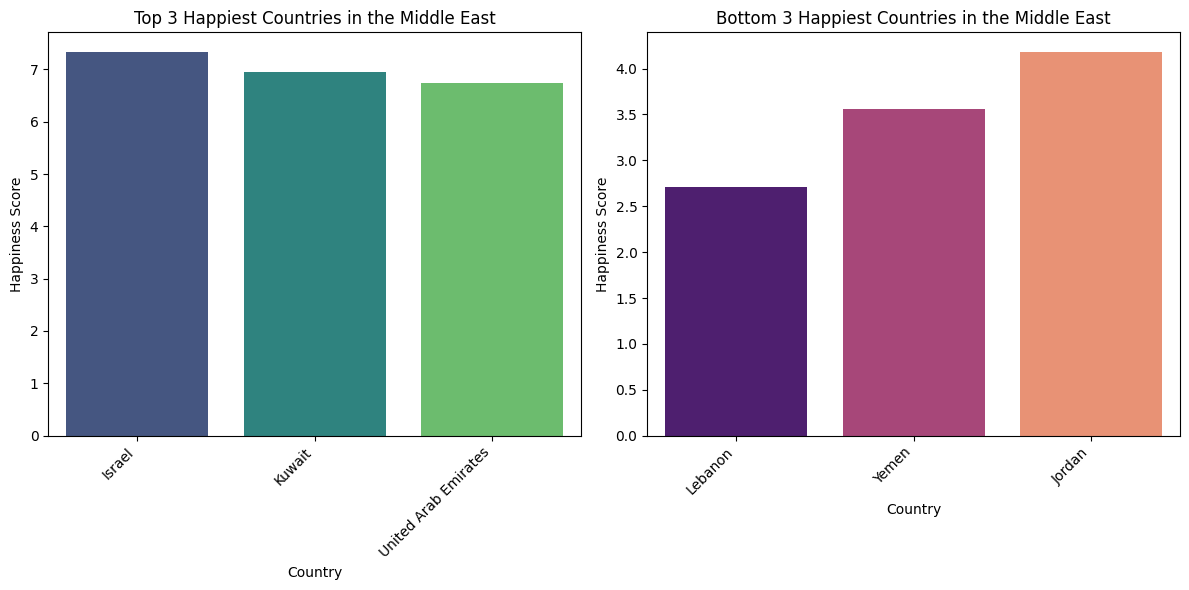

In [ ]:
#2. Top and Bottom Performers:

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
    "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter the DataFrame to include only Middle Eastern countries
if not df.empty and 'Country name' in df.columns:
    middle_east_df = df[df['Country name'].isin(middle_east_countries)]

    # Display the filtered DataFrame
    print("Middle East Dataset:\n", middle_east_df)

    #Top and Bottom Performers
    if not middle_east_df.empty and 'score' in middle_east_df.columns:
        # Identify the top 3 and bottom 3 countries
        top3_countries = middle_east_df.nlargest(3, 'score')
        bottom3_countries = middle_east_df.nsmallest(3, 'score')

        # Plotting bar charts for comparison
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        sns.barplot(x='Country name', y='score', data=top3_countries, palette='viridis')
        plt.title('Top 3 Happiest Countries in the Middle East')
        plt.xlabel('Country')
        plt.ylabel('Happiness Score')
        plt.xticks(rotation=45, ha='right')

        plt.subplot(1, 2, 2)
        sns.barplot(x='Country name', y='score', data=bottom3_countries, palette='magma')
        plt.title('Bottom 3 Happiest Countries in the Middle East')
        plt.xlabel('Country')
        plt.ylabel('Happiness Score')
        plt.xticks(rotation=45, ha='right')

        plt.tight_layout()
        plt.show()
else:
    print("Error: The DataFrame is empty or 'Country name' column is missing.")

Middle East Dataset:
              Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661         

<ipython-input-22-d38c077daf30>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country name', y=metric, data=middle_east_df, palette='viridis')
<ipython-input-22-d38c077daf30>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country name', y=metric, data=middle_east_df, palette='viridis')
<ipython-input-22-d38c077daf30>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country name', y=metric, data=middle_east_df, palette='viridis')


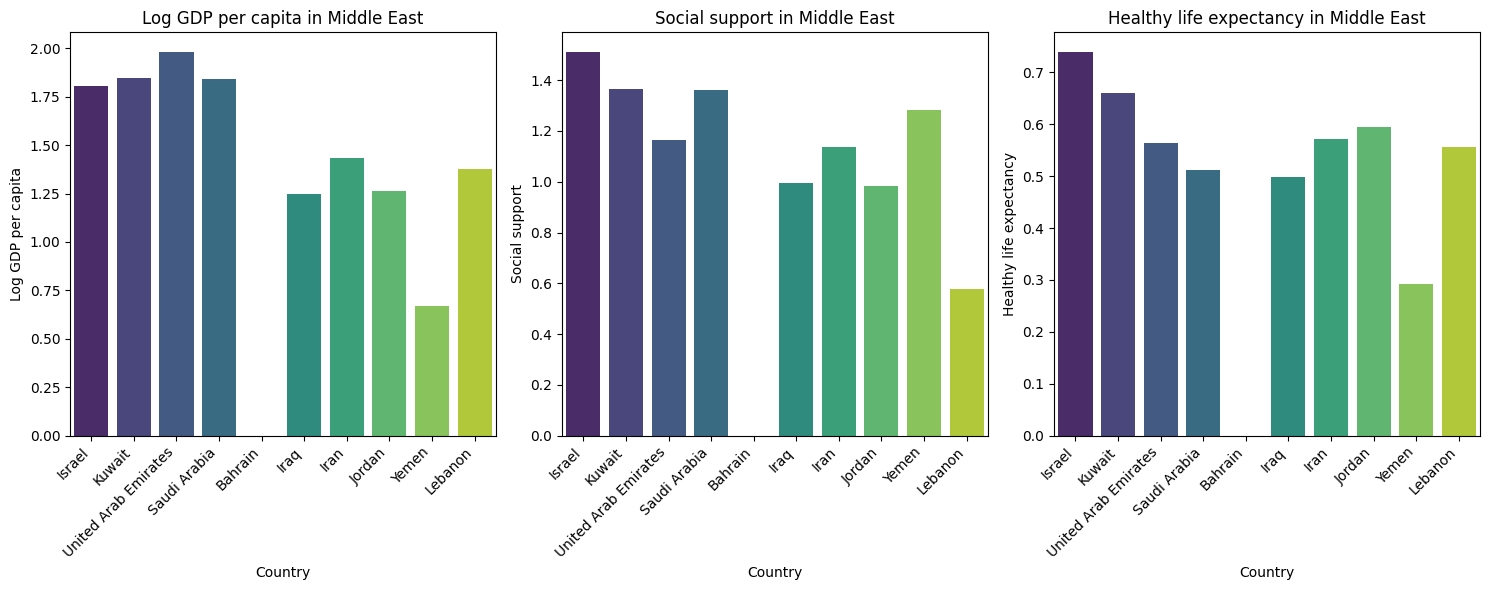

The largest disparity is in Log GDP per capita with a value of 1.31


In [ ]:
#3. Metric Comparisons:

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
    "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter the DataFrame to include only Middle Eastern countries
if not df.empty and 'Country name' in df.columns:
    middle_east_df = df[df['Country name'].isin(middle_east_countries)]

    # Display the filtered DataFrame
    print("Middle East Dataset:\n", middle_east_df)

    #Now we will compare key metrics
    metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
    if all(metric in middle_east_df.columns for metric in metrics):
      plt.figure(figsize=(15, 6))

      for i, metric in enumerate(metrics):
          plt.subplot(1, 3, i + 1)
          sns.barplot(x='Country name', y=metric, data=middle_east_df, palette='viridis')
          plt.title(f'{metric} in Middle East')
          plt.xlabel('Country')
          plt.ylabel(metric)
          plt.xticks(rotation=45, ha='right')
      plt.tight_layout()
      plt.show()

      #Identify largest disparity
      disparities = {}
      for metric in metrics:
          disparities[metric] = middle_east_df[metric].max() - middle_east_df[metric].min()

      max_disparity_metric = max(disparities, key=disparities.get)
      print(f"The largest disparity is in {max_disparity_metric} with a value of {disparities[max_disparity_metric]:.2f}")
else:
    print("Error: The DataFrame is empty or necessary columns are missing.")

In [ ]:
#4. Happiness Disparity:

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
    "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter the DataFrame to include only Middle Eastern countries
if not df.empty and 'Country name' in df.columns:
    middle_east_df = df[df['Country name'].isin(middle_east_countries)]

    # Display the filtered DataFrame
    print("Middle East Dataset:\n", middle_east_df)

    # Happiness Disparity Analysis
    if not middle_east_df.empty and 'score' in middle_east_df.columns:
        # Calculate range and coefficient of variation for 'Score' in both regions
        score_range_me = middle_east_df['score'].max() - middle_east_df['score'].min()
        score_cv_me = middle_east_df['score'].std() / middle_east_df['score'].mean()

        if not south_asia_df.empty and 'score' in south_asia_df.columns:
          score_range_sa = south_asia_df['score'].max() - south_asia_df['score'].min()
          score_cv_sa = south_asia_df['score'].std() / south_asia_df['score'].mean()

          print("\nHappiness Disparity Analysis:")
          print("Middle East:")
          print(f"Range of Happiness Score: {score_range_me:.2f}")
          print(f"Coefficient of Variation: {score_cv_me:.2f}")

          print("\nSouth Asia:")
          print(f"Range of Happiness Score: {score_range_sa:.2f}")
          print(f"Coefficient of Variation: {score_cv_sa:.2f}")

          # Determine which region has greater variability
          if score_cv_me > score_cv_sa:
              print("\nThe Middle East has greater variability in happiness scores.")
          elif score_cv_sa > score_cv_me:
              print("\nSouth Asia has greater variability in happiness scores.")
          else:
              print("\nBoth regions have similar variability in happiness scores.")
        else:
          print("Error: South Asia DataFrame is empty or does not have 'score' column.")
    else:
      print("Error: Middle East DataFrame is empty or does not have 'score' column.")
else:
    print("Error: The DataFrame is empty or 'Country name' column is missing.")

Middle East Dataset:
              Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661         

Middle East Dataset:
              Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661         

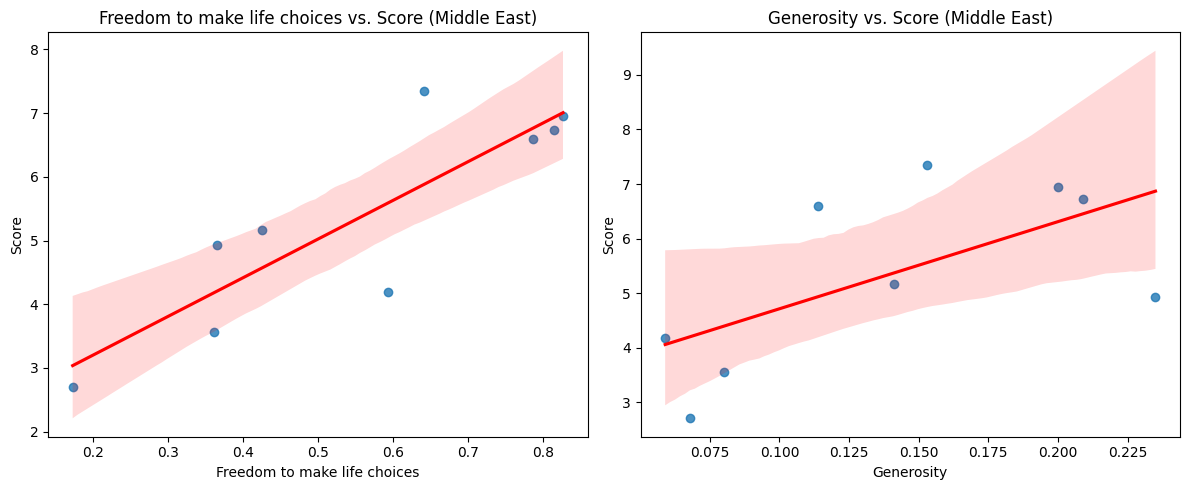

Pearson correlation between Freedom to make life choices and Score (Middle East): 0.86
Pearson correlation between Generosity and Score (Middle East): 0.63


In [ ]:
#5. Correlation Analysis:

middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
    "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter the DataFrame to include only Middle Eastern countries
if not df.empty and 'Country name' in df.columns:
    middle_east_df = df[df['Country name'].isin(middle_east_countries)]

    # Display the filtered DataFrame
    print("Middle East Dataset:\n", middle_east_df)

    # Correlation Analysis
    metrics = ['Freedom to make life choices', 'Generosity']
    if all(metric in middle_east_df.columns for metric in metrics) and 'score' in middle_east_df.columns:
        plt.figure(figsize=(12, 5))

        for i, metric in enumerate(metrics):
            plt.subplot(1, 2, i + 1)
            sns.regplot(x=metric, y='score', data=middle_east_df, line_kws={"color": "red"})
            plt.title(f'{metric} vs. Score (Middle East)')
            plt.xlabel(metric)
            plt.ylabel('Score')

        plt.tight_layout()
        plt.show()

        # Calculate and print correlation coefficients
        for metric in metrics:
            correlation = middle_east_df[metric].corr(middle_east_df['score'], method='pearson')
            print(f"Pearson correlation between {metric} and Score (Middle East): {correlation:.2f}")
else:
    print("Error: The DataFrame is empty or necessary columns are missing.")

Middle East Dataset:
              Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661         

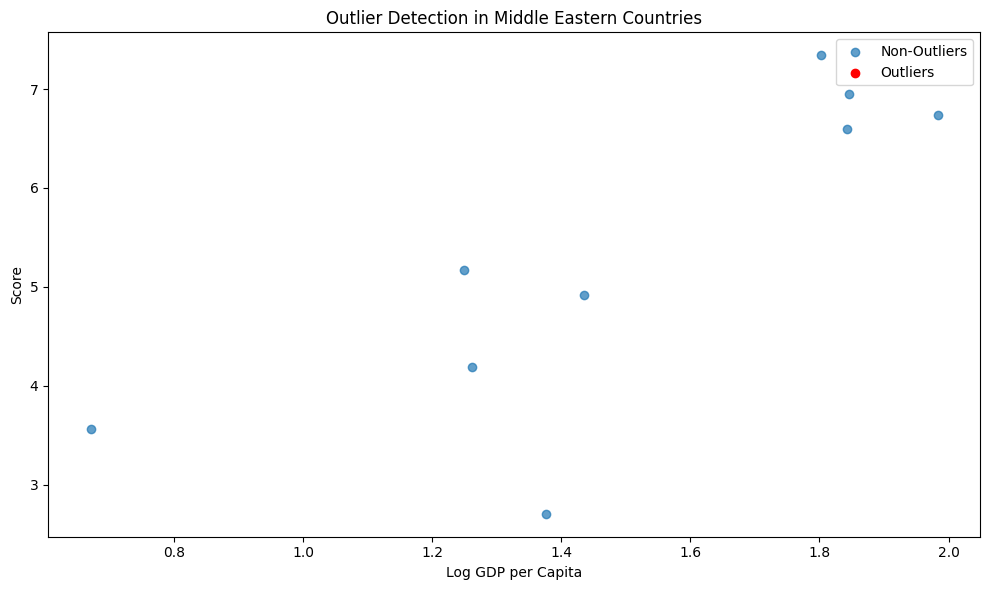

Outlier Countries: []

Discussion:
No outliers found based on the defined criteria.


In [ ]:
#6. Outlier Detection:

# Assuming 'df' is your original DataFrame containing the World Happiness Report data

# Define the list of Middle Eastern countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
    "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter the DataFrame to include only Middle Eastern countries
if not df.empty and 'Country name' in df.columns:
    middle_east_df = df[df['Country name'].isin(middle_east_countries)].copy()

    print("Middle East Dataset:\n", middle_east_df)

    # Outlier Detection
    if not middle_east_df.empty and 'Log GDP per capita' in middle_east_df.columns and 'score' in middle_east_df.columns:
        # Calculate IQR for 'Log GDP per capita'
        Q1_gdp = middle_east_df['Log GDP per capita'].quantile(0.25)
        Q3_gdp = middle_east_df['Log GDP per capita'].quantile(0.75)
        IQR_gdp = Q3_gdp - Q1_gdp
        lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
        upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

        # Calculate IQR for 'score'
        Q1_score = middle_east_df['score'].quantile(0.25)
        Q3_score = middle_east_df['score'].quantile(0.75)
        IQR_score = Q3_score - Q1_score
        lower_bound_score = Q1_score - 1.5 * IQR_score
        upper_bound_score = Q3_score + 1.5 * IQR_score

        # Identify outliers
        outliers = middle_east_df[
            (middle_east_df['Log GDP per capita'] < lower_bound_gdp) |
            (middle_east_df['Log GDP per capita'] > upper_bound_gdp) |
            (middle_east_df['score'] < lower_bound_score) |
            (middle_east_df['score'] > upper_bound_score)
        ]

        # Plotting outliers
        plt.figure(figsize=(10, 6))
        plt.scatter(middle_east_df['Log GDP per capita'], middle_east_df['score'], label='Non-Outliers', alpha=0.7)
        plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers', alpha=1)
        plt.xlabel('Log GDP per Capita')
        plt.ylabel('Score')
        plt.title('Outlier Detection in Middle Eastern Countries')
        plt.legend()
        plt.tight_layout()
        plt.show()

        print("Outlier Countries:", outliers['Country name'].tolist())

        # Discussion of implications (replace with your analysis)
        print("\nDiscussion:")
        if not outliers.empty:
            print("These countries exhibit significant deviations in either GDP per capita or Happiness score compared to the majority of other Middle Eastern nations.")
            print("Potential impact: Outliers can skew regional averages, affecting overall insights into the region's development and well-being. Further investigation is required to understand these deviations.")
        else:
            print("No outliers found based on the defined criteria.")

    else:
        print("Error: Required columns not found in the DataFrame or the DataFrame is empty.")
else:
    print("Error: The DataFrame is empty or 'Country name' column is missing.")

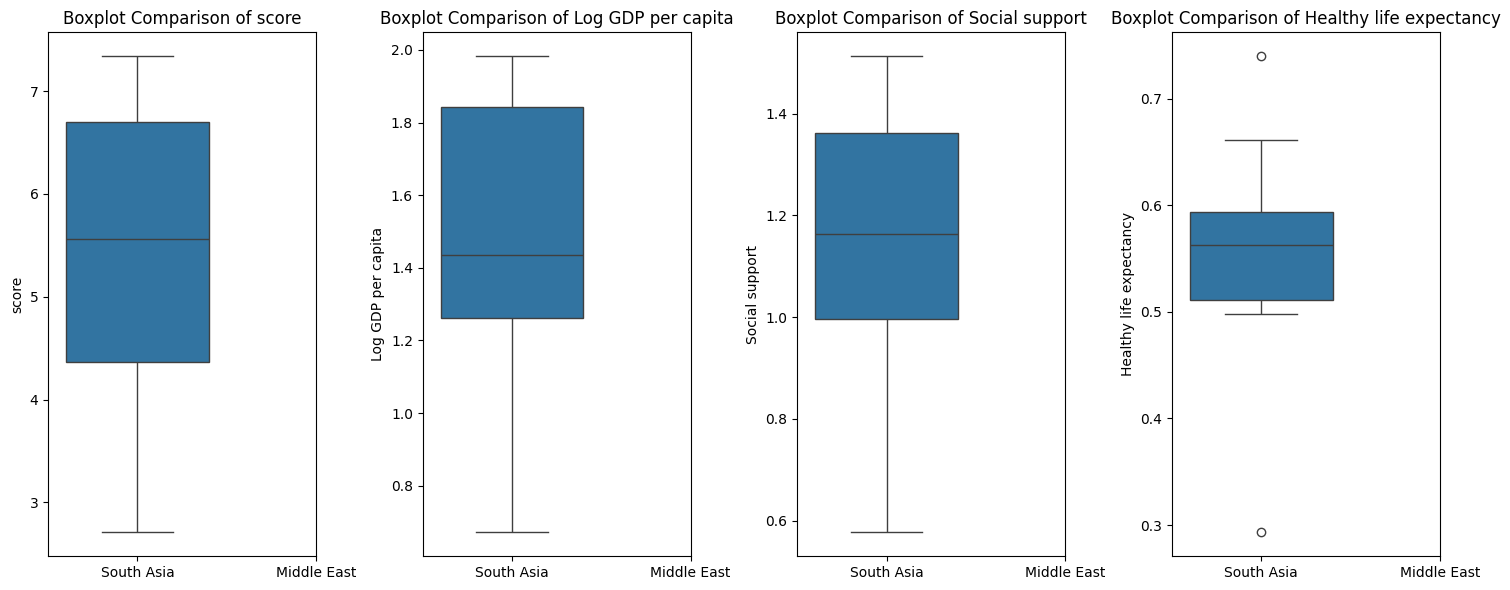

In [ ]:

#7. Visualization:


# Define the list of Middle Eastern countries
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# Filter the DataFrame for Middle Eastern countries
middle_east_df = df[df['Country name'].isin(middle_east_countries)]

# Define metrics to compare
# Changed 'Score' to 'score' to match the column name in the DataFrame
metrics = ['score', 'Log GDP per capita', 'Social support', 'Healthy life expectancy']

# Create boxplots for comparison
plt.figure(figsize=(15, 6))
for i, metric in enumerate(metrics):
    plt.subplot(1, len(metrics), i+1)
    sns.boxplot(data=[south_asia_df[metric], middle_east_df[metric]], orient='v')
    plt.xticks([0, 1], ['South Asia', 'Middle East'])
    plt.ylabel(metric)
    plt.title(f'Boxplot Comparison of {metric}')

plt.tight_layout()
plt.show()